<a href="https://colab.research.google.com/github/GooZzzEee0123/dumb-goose/blob/master/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(SportsAnalytics)
NBA1516<-fetch_NBAPlayerStatistics("15-16")

`geom_smooth()` using formula 'y ~ x'



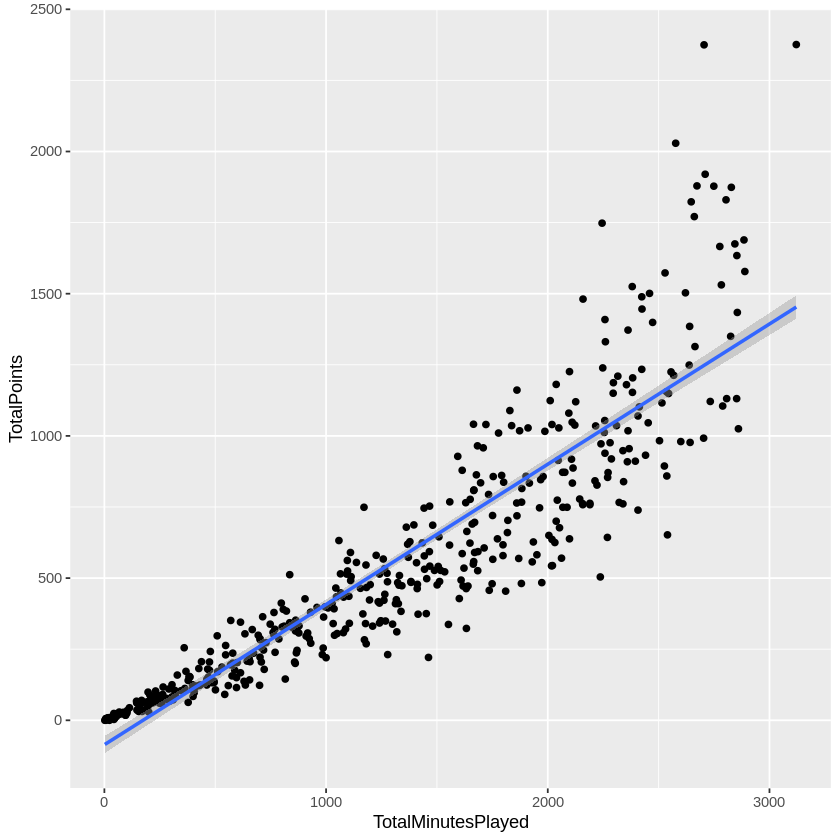

In [5]:
library(ggplot2)
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [6]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [7]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [8]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [11]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [12]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [13]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [14]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

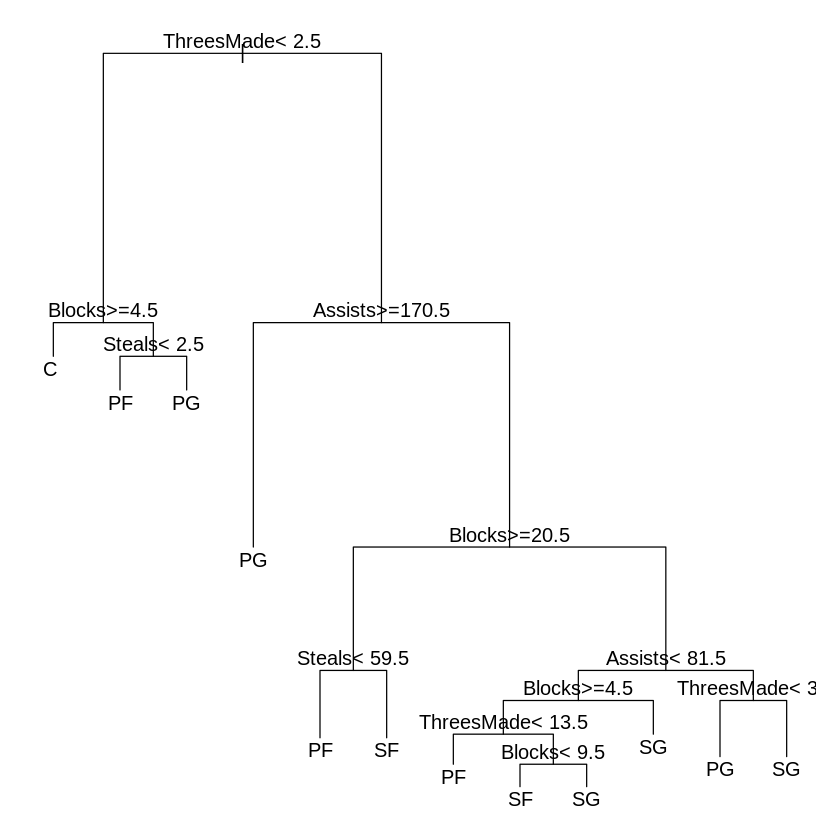

In [16]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [17]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



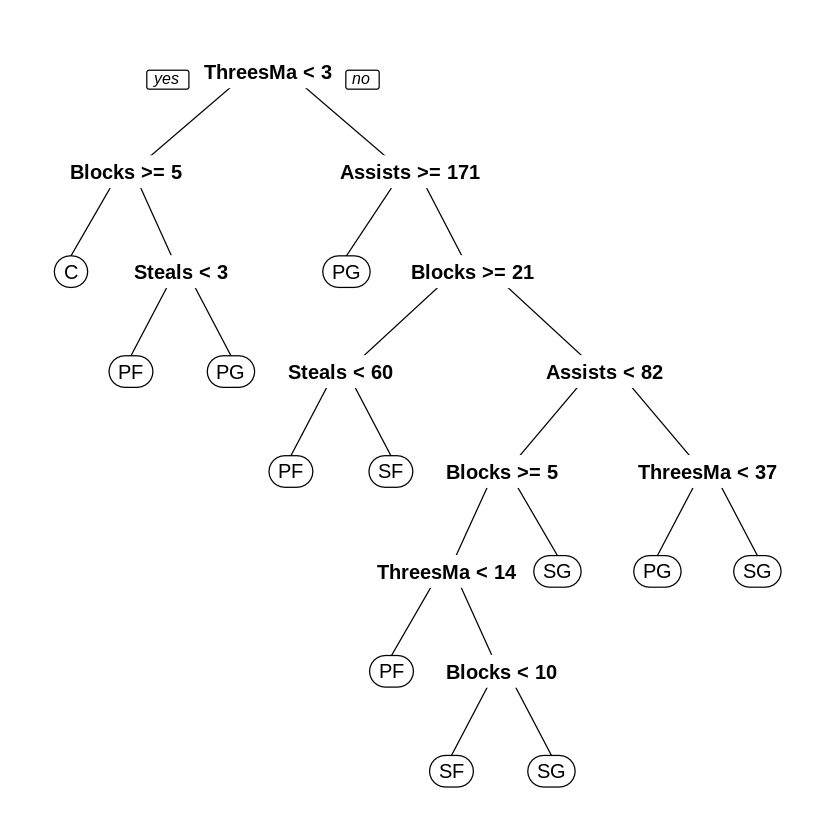

In [18]:
library(rpart.plot)
prp(DT)

ERROR: ignored

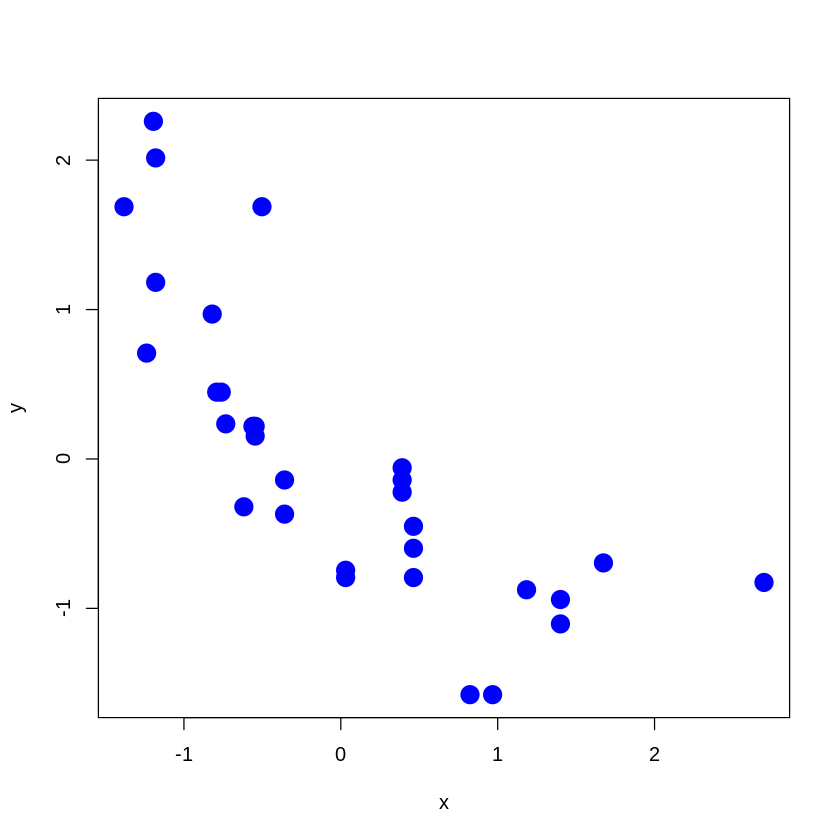

In [19]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

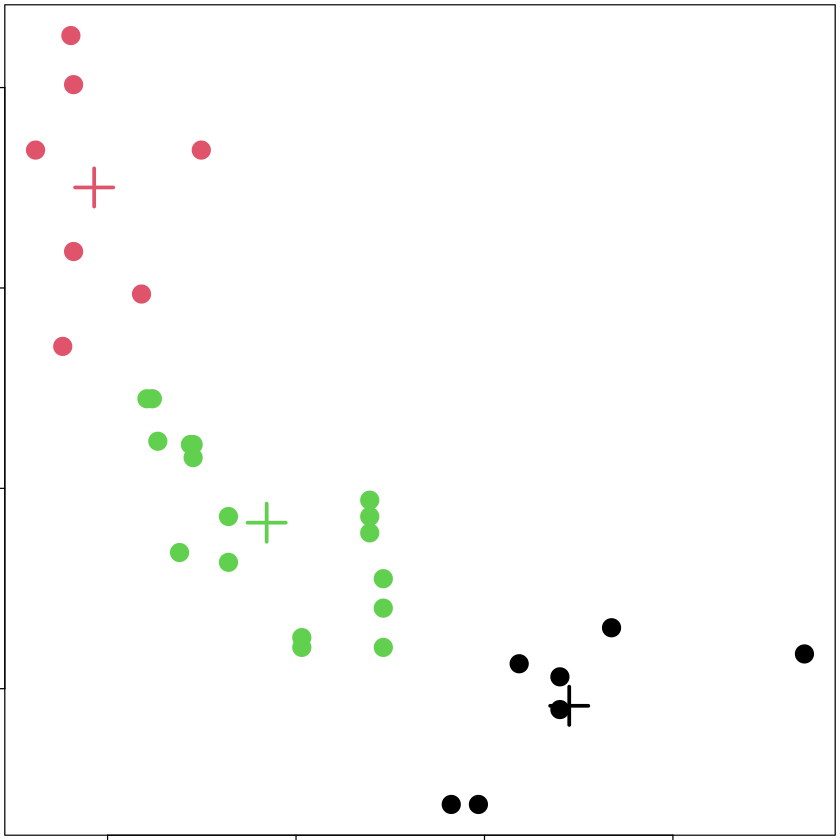

In [21]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

In [23]:
if (!require('arules')){
install.packages("arules");
library(arules) 
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) 
}
data(Groceries) 

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [24]:
rules <- apriori(Groceries, 

parameter = list(supp = 0.001, conf = 0.8),
control = list(verbose=F)) 

options(digits=2) 
inspect(rules[1:5]) 

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [25]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [26]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [49]:
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [50]:
NBA1819$Test<-F
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [51]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.583,6.7528,1.4,1.6e-01
TotalMinutesPlayed,0.010,0.0076,1.4,1.7e-01
FieldGoalsAttempted,0.991,0.0266,37.3,5.4e-123
PositionPF,-11.993,7.6623,-1.6,1.2e-01
PositionPG,-45.792,7.8798,-5.8,1.4e-08
PositionSF,-26.549,8.1049,-3.3,1.2e-03
PositionSG,-33.753,8.0610,-4.2,3.6e-05
ThreesAttempted,0.094,0.0265,3.5,4.5e-04
FreeThrowsAttempted,0.889,0.0438,20.3,1.0e-60


In [52]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),13.110,6.254,2.1,3.7e-02
FieldGoalsAttempted,1.016,0.019,52.5,1.2e-166
PositionPF,-12.951,7.640,-1.7,9.1e-02
PositionPG,-47.192,7.824,-6.0,4.2e-09
PositionSF,-26.992,8.109,-3.3,9.7e-04
PositionSG,-35.125,8.009,-4.4,1.5e-05
ThreesAttempted,0.095,0.027,3.6,4.1e-04
FreeThrowsAttempted,0.876,0.043,20.4,2.0e-61


In [53]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.583,6.7528,1.4,1.6e-01
TotalMinutesPlayed,0.010,0.0076,1.4,1.7e-01
FieldGoalsAttempted,0.991,0.0266,37.3,5.4e-123
PositionPF,-11.993,7.6623,-1.6,1.2e-01
PositionPG,-45.792,7.8798,-5.8,1.4e-08
PositionSF,-26.549,8.1049,-3.3,1.2e-03
PositionSG,-33.753,8.0610,-4.2,3.6e-05
ThreesAttempted,0.094,0.0265,3.5,4.5e-04
FreeThrowsAttempted,0.889,0.0438,20.3,1.0e-60


In [55]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),13.110,6.254,2.1,3.7e-02
FieldGoalsAttempted,1.016,0.019,52.5,1.2e-166
PositionPF,-12.951,7.640,-1.7,9.1e-02
PositionPG,-47.192,7.824,-6.0,4.2e-09
PositionSF,-26.992,8.109,-3.3,9.7e-04
PositionSG,-35.125,8.009,-4.4,1.5e-05
ThreesAttempted,0.095,0.027,3.6,4.1e-04
FreeThrowsAttempted,0.876,0.043,20.4,2.0e-61


In [56]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1819[NBA1819$Test==T,])

cor(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

[1] 1

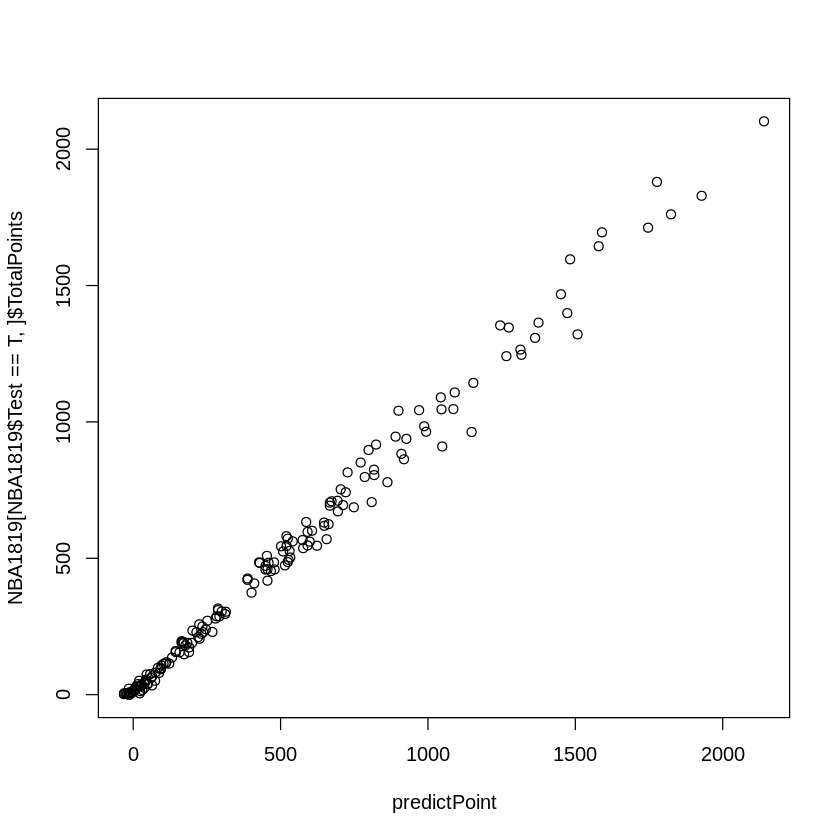

In [57]:
plot(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)

In [58]:
NBA1718<-fetch_NBAPlayerStatistics("17-18")
NBA1718<-NBA1718[complete.cases(NBA1718),]

In [59]:
NBA1718$Test<-F
NBA1718[sample(1:nrow(NBA1718),nrow(NBA1718)/3),"Test"]<-T
c(sum(NBA1718$Test==F),sum(NBA1718$Test==T))

[1] 360 179

In [60]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1718[NBA1718$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.748,6.7165,0.86,3.9e-01
TotalMinutesPlayed,0.014,0.0076,1.78,7.6e-02
FieldGoalsAttempted,0.929,0.0265,35.03,1.3e-116
PositionPF,-6.513,7.6671,-0.85,4.0e-01
PositionPG,-28.341,7.7791,-3.64,3.1e-04
PositionSF,-17.749,7.7799,-2.28,2.3e-02
PositionSG,-18.842,7.7424,-2.43,1.5e-02
ThreesAttempted,0.174,0.0281,6.18,1.8e-09
FreeThrowsAttempted,0.894,0.0449,19.88,1.9e-59


In [61]:
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.748,6.7165,0.86,3.9e-01
TotalMinutesPlayed,0.014,0.0076,1.78,7.6e-02
FieldGoalsAttempted,0.929,0.0265,35.03,1.3e-116
PositionPF,-6.513,7.6671,-0.85,4.0e-01
PositionPG,-28.341,7.7791,-3.64,3.1e-04
PositionSF,-17.749,7.7799,-2.28,2.3e-02
PositionSG,-18.842,7.7424,-2.43,1.5e-02
ThreesAttempted,0.174,0.0281,6.18,1.8e-09
FreeThrowsAttempted,0.894,0.0449,19.88,1.9e-59


In [62]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.748,6.7165,0.86,3.9e-01
TotalMinutesPlayed,0.014,0.0076,1.78,7.6e-02
FieldGoalsAttempted,0.929,0.0265,35.03,1.3e-116
PositionPF,-6.513,7.6671,-0.85,4.0e-01
PositionPG,-28.341,7.7791,-3.64,3.1e-04
PositionSF,-17.749,7.7799,-2.28,2.3e-02
PositionSG,-18.842,7.7424,-2.43,1.5e-02
ThreesAttempted,0.174,0.0281,6.18,1.8e-09
FreeThrowsAttempted,0.894,0.0449,19.88,1.9e-59


In [63]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.748,6.7165,0.86,3.9e-01
TotalMinutesPlayed,0.014,0.0076,1.78,7.6e-02
FieldGoalsAttempted,0.929,0.0265,35.03,1.3e-116
PositionPF,-6.513,7.6671,-0.85,4.0e-01
PositionPG,-28.341,7.7791,-3.64,3.1e-04
PositionSF,-17.749,7.7799,-2.28,2.3e-02
PositionSG,-18.842,7.7424,-2.43,1.5e-02
ThreesAttempted,0.174,0.0281,6.18,1.8e-09
FreeThrowsAttempted,0.894,0.0449,19.88,1.9e-59


In [64]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1718[NBA1718$Test==T,])

cor(x=predictPoint,y=NBA1718[NBA1718$Test==T,]$TotalPoints)

[1] 1

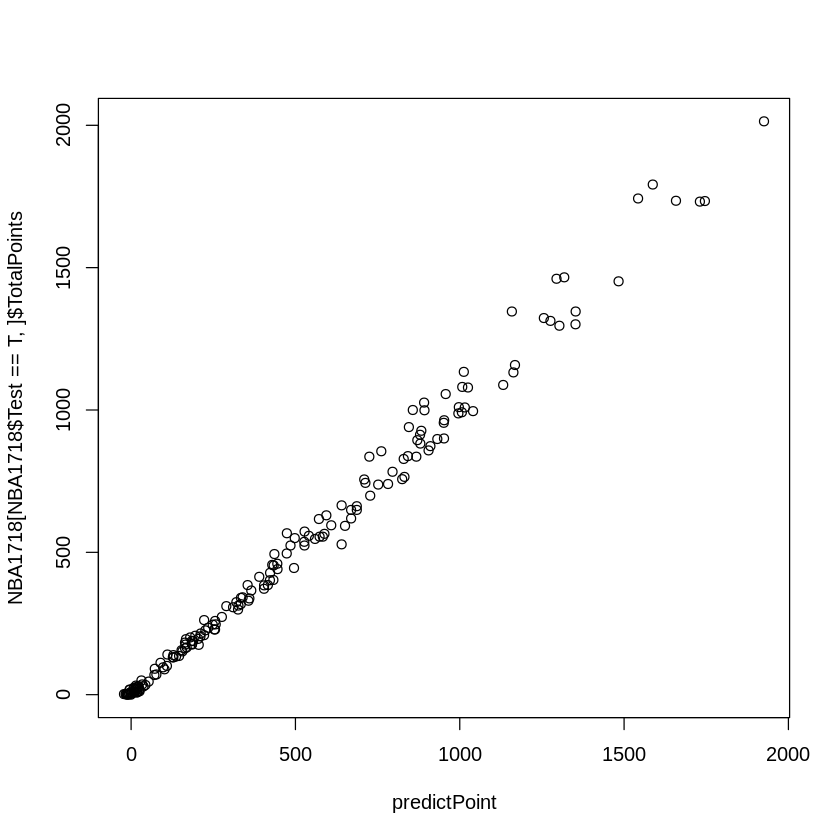

In [65]:
plot(x=predictPoint,y=NBA1718[NBA1718$Test==T,]$TotalPoints)